In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
import re
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df = pd.read_csv('/Users/calvi/Downloads/man united stats.csv')

In [3]:
df.dtypes

index       int64
Player     object
Team       object
Apps        int64
Min         int64
G           int64
A           int64
xG         object
xA         object
xG90      float64
xA90      float64
dtype: object

In [4]:
#clearing everything uneccessary for xGA xG after +-
def clean_numeric(s):
    return re.sub(r'([+-]?\d+\.\d+)([+-]?\d+\.\d+)?(?=[+-]|\b)', lambda x: x.group(1), s)
columns_to_clean = ['xG', 'xA']
df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.map(clean_numeric))
print(df)

    index              Player               Team  Apps   Min  G  A    xG  \
0      29     Scott McTominay  Manchester United    17  1109  5  0  4.07   
1      53     Marcus Rashford  Manchester United    19  1334  3  2  5.39   
2      56     Bruno Fernandes  Manchester United    19  1710  3  3  4.84   
3      71  Alejandro Garnacho  Manchester United    18  1066  3  2  3.66   
4     127     Anthony Martial  Manchester United    13   430  1  0  1.06   
5     128   Christian Eriksen  Manchester United    14   779  1  1  0.50   
6     144      Raphael Varane  Manchester United    11   608  1  0  0.97   
7     145            Casemiro  Manchester United     8   655  1  0  1.90   
8     157     Victor Lindelöf  Manchester United    12   915  1  1  0.20   
9     176         Diogo Dalot  Manchester United    18  1551  1  1  0.52   
10    198     Hannibal Mejbri  Manchester United     5   124  1  0  0.02   
11    215      Rasmus Højlund  Manchester United    15  1056  1  0  3.69   
12    260   

In [5]:
# Convert columns to numeric types
df["xG90"] = pd.to_numeric(df["xG90"], errors='coerce')
df["xA90"] = pd.to_numeric(df["xA90"], errors='coerce')
df["xA"] = pd.to_numeric(df["xA"], errors='coerce')
df["xG"] = pd.to_numeric(df["xG"], errors='coerce')

In [6]:
# Set up the colors
# Use Coolors to get the color hex codes: https://coolors.co/?ref=65623355a0453d000b8a2708
bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text

row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "bottom6": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [7]:
df = df.drop('index', axis=1)

In [8]:
col_defs = [
    ColumnDefinition(
        name="Player",
        textprops={"ha": "center"},
        width=0.75,
    ),
    ColumnDefinition(
        name="Team",
        textprops={"ha": "left", "weight": "bold"},
        width=.5,
    ),
    ColumnDefinition(
        name="Apps",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Min",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="G",
        group="Stats",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="A",
        group="Stats",
        textprops={"ha": "center"},
        width=0.5,
        ),
    ColumnDefinition(
        name="xG90",
        group="Expected Stats",
        width=0.5,
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xG90"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xA90",
        group="Expected Stats",
        width=0.5,
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xA90"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xA",
        group="Expected Stats",
        width=0.5,
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xA"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
   # Get the minimum and maximum values of 'xG' for scaling the colors
min_xG = df["xG"].min()
max_xG = df["xG"].max()

# Choose the midpoint value (you can adjust this based on your preferences)
midpoint = (min_xG + max_xG) / 2

# Determine the colors based on the comparison between 'xG' and 'G'
colors = [mcolors.to_rgba("green", alpha=abs(xg - g) / (midpoint - min_xG))
          if xg < g else mcolors.to_rgba("red", alpha=abs(xg - g) / (max_xG - midpoint))
          for xg, g in zip(df["xG"], df["G"])]

# Update the 'xG' column definition in col_defs
col_defs[-1] = ColumnDefinition(
    name="xG",
    group="Expected Stats",
    width=0.5,
    textprops={
        "ha": "center",
        "color": colors,
        "weight": "bold",
        "bbox": {"boxstyle": "circle", "pad": 0.35}
    },
)
]

/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_24364/1387447249.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


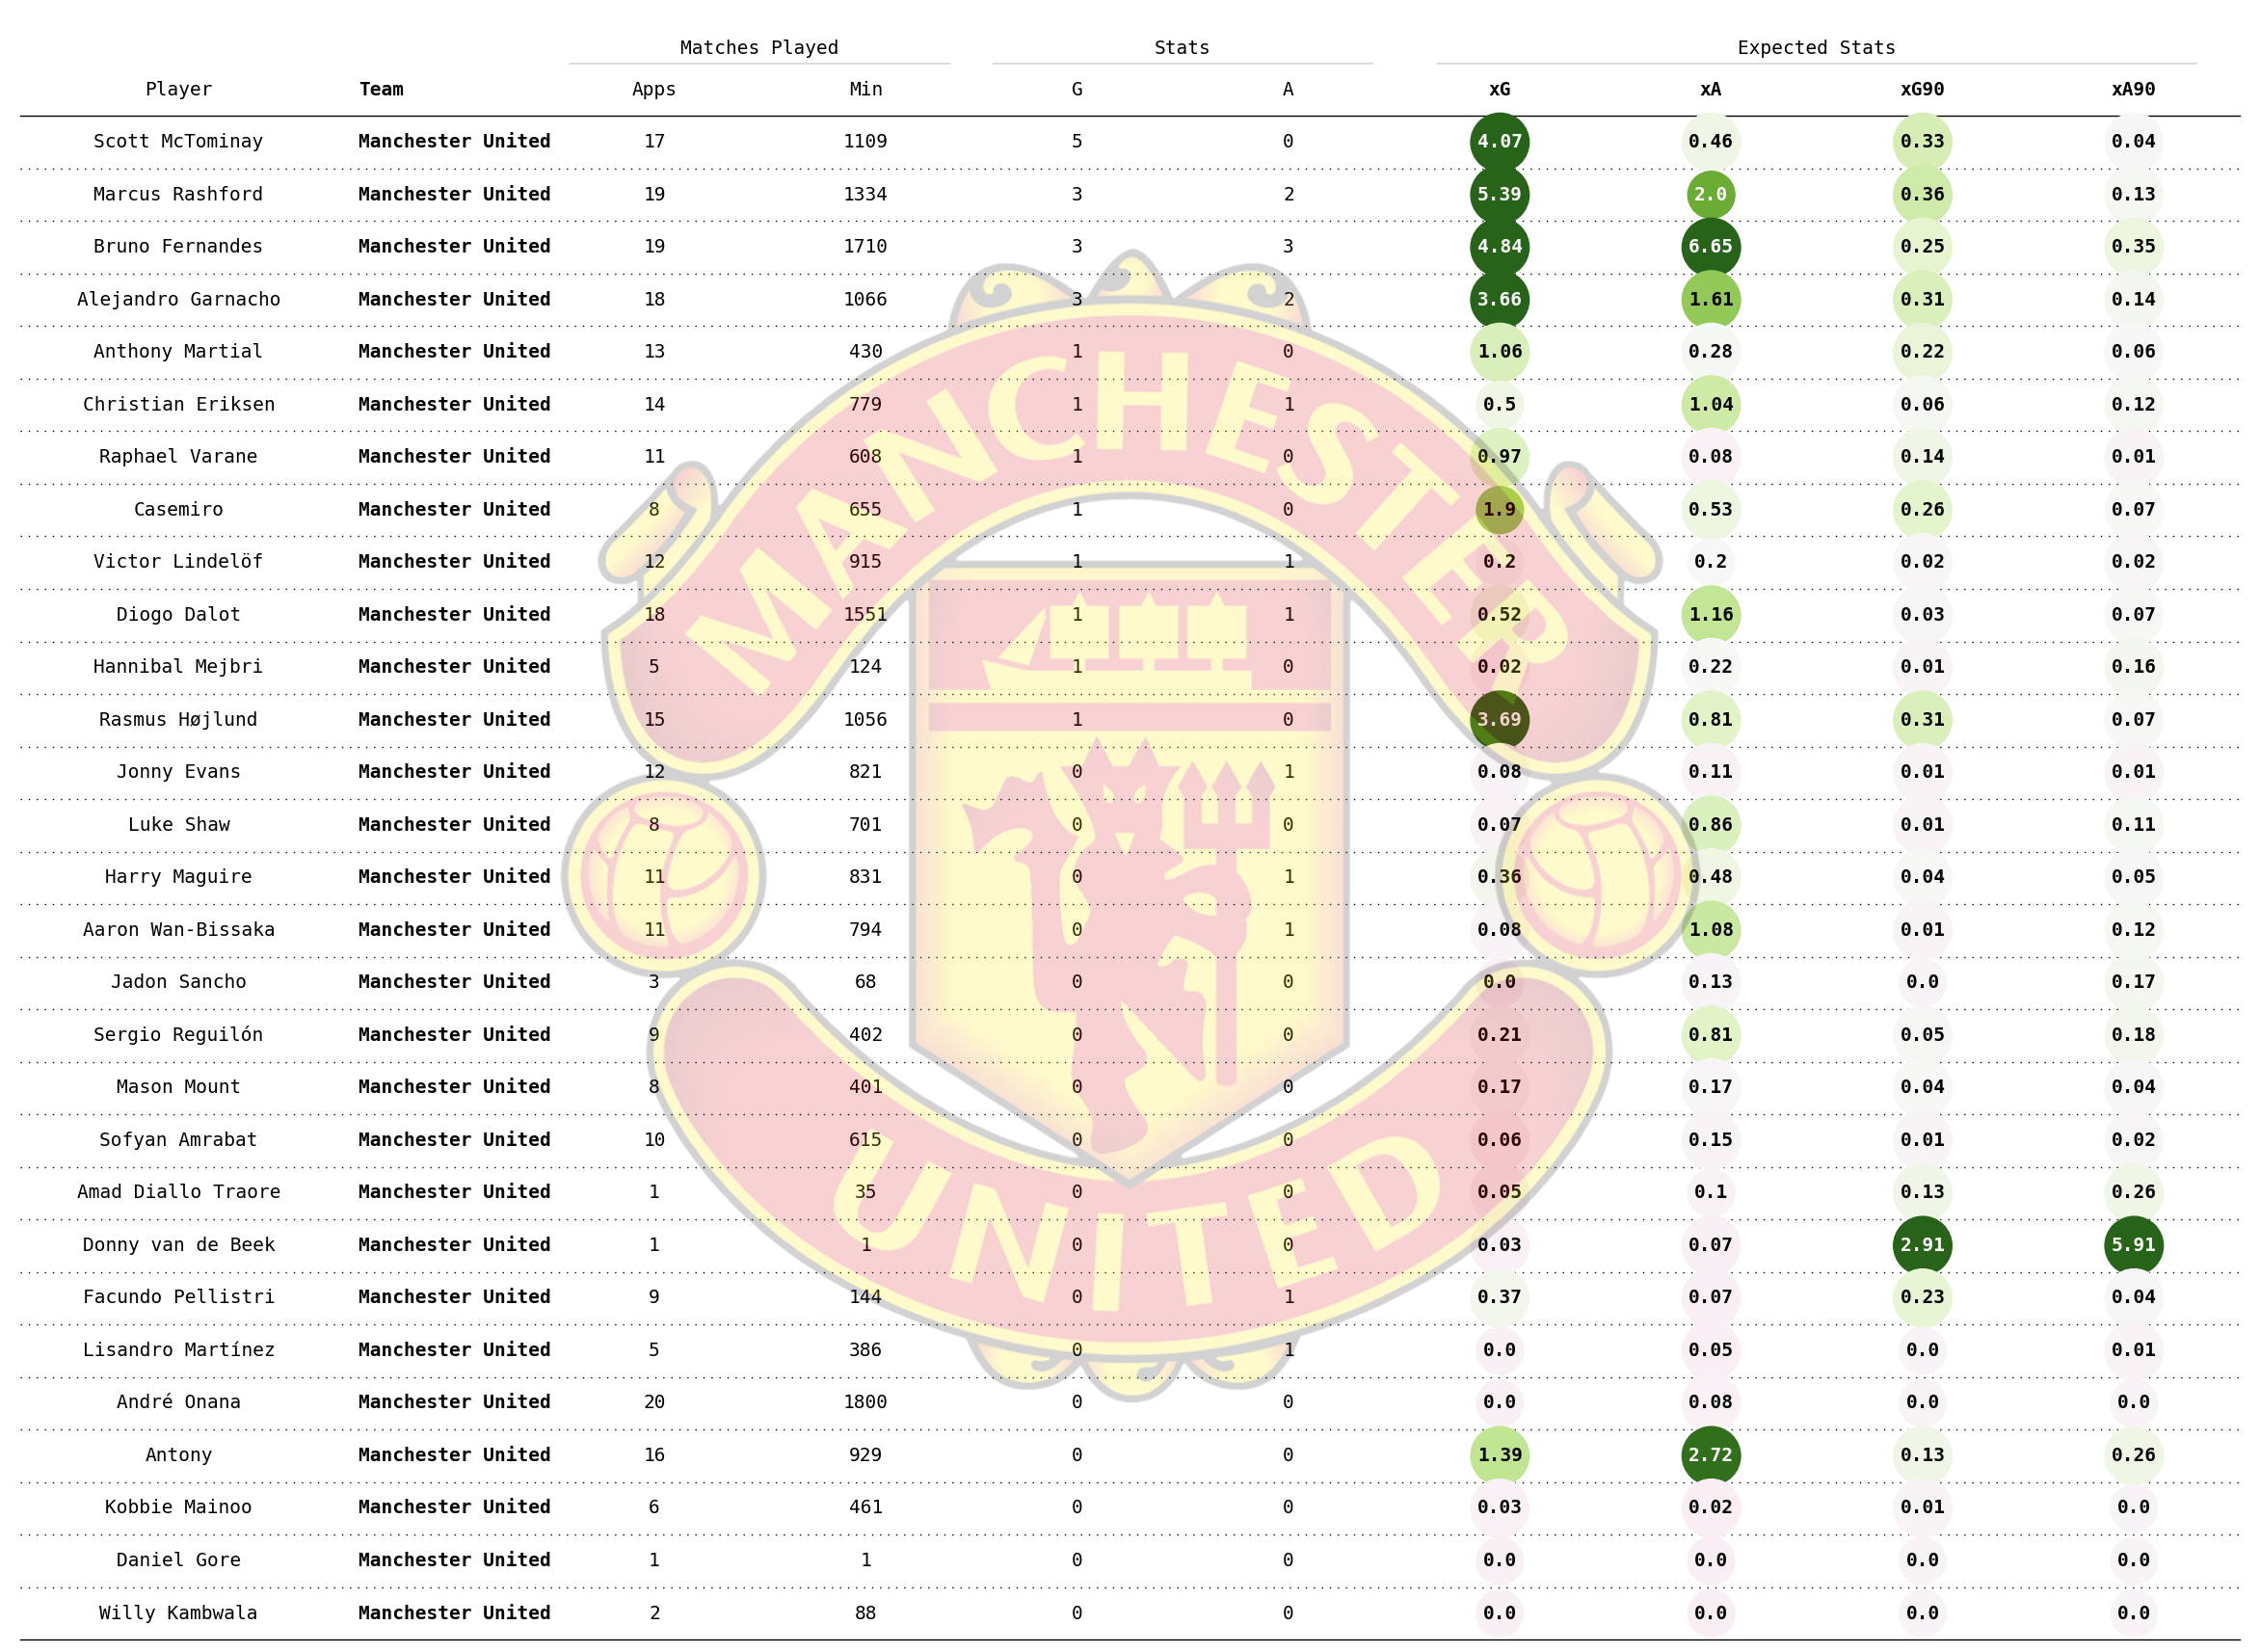

In [10]:
# Ok lets actually create the table
fig, ax = plt.subplots(figsize=(30, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Player",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xA", "xG90","xA90"]) # This will set the font color of the columns based on the cmap so the text is readable

# Here we can add colors to the rows
# I personally don't like the look of this, but it's an option

#for idx in [0, 1, 2, 3]:
    #table.rows[idx].set_facecolor(row_colors["top4"])

#for idx in [4, 5, 6, 7]:
    #table.rows[idx].set_facecolor(row_colors["top6"])
#
#
#for idx in [27, 28, 29]:
    #table.rows[idx].set_facecolor(row_colors["bottom6"])
#table.cells[10, 3].textprops["color"] = "#8ACB88"
logo_path = '/Users/calvi/Downloads/team_logos/manchester united_logo.png'  # Replace with the path to your logo image
logo = plt.imread(logo_path)
imagebox = OffsetImage(logo, zoom=.75, alpha=0.2)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction', boxcoords="axes fraction", frameon=False)
ax.add_artist(ab)


fig.show()